In [18]:
## Regresiones Lineales:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Definimos la función lineal que utilizaremos para el ajuste
def lineal(x, a, b):
    return a * x + b

# Función para ajustar la curva con incertidumbres
def fit_with_curve(funcion, x, y, y_err):
    popt, pcov = curve_fit(funcion, x, y, sigma=y_err, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    print(f"Pendiente (a) = {popt[0]} ± {perr[0]}")
    print(f"Intersección (b) = {popt[1]} ± {perr[1]}")
    return popt[0], popt[1], perr[0], perr[1]

In [19]:
# Cargar los datos desde el archivo CSV
#df = pd.read_csv('NombreArchivo.csv')
df = pd.DataFrame(columns=["a","b"])
df["a"] = [1, 2, 3, 4]
eps = 0.1
df["b"] = [1 + eps, 2 - eps, 3 + 2*eps, 4 - 2*eps]

eps_pend = 0.1
df['Eb'] = [eps_pend] * 4

Pendiente (a) = 0.939999999999869 ± 0.044721359663516924
Intersección (b) = 0.1499999999981464 ± 0.1224744822712139


<ipython-input-21-1d3af8aef596>:11: RuntimeWarning: divide by zero encountered in scalar divide
  R2 = 1 - np.sum((lineal(variableX, pendiente, interseccion) - variableY)*2) / \


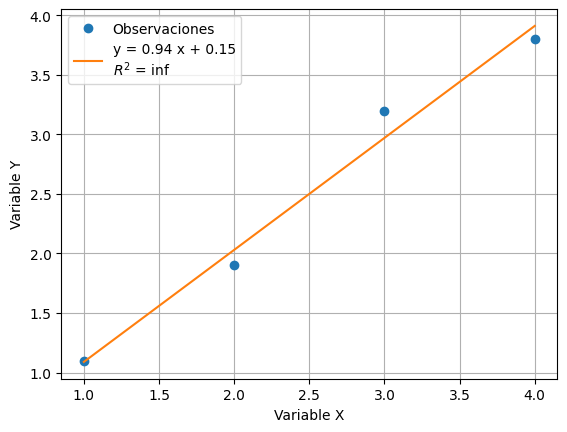

Pendiente (a) = 0.94 ± 0.045
Intersección (b) = 0.15 ± 0.122
0.045


In [21]:
# Datos de entrada
variableX = df['a'] #NombreVariableX
variableY = df['b'] #NombreVariableY
incertidumbre_variableY = df['Eb'] #NombreVariableErrorY'

# Ajuste de la curva utilizando la función de ajuste personalizada
pendiente, interseccion, error_pendiente, error_interseccion = \
    fit_with_curve(lineal, variableX, variableY, incertidumbre_variableY)

# Cálculo del coeficiente de determinación R^2
R2 = 1 - np.sum((lineal(variableX, pendiente, interseccion) - variableY)*2) / \
         np.sum((variableY - np.mean(variableY))*2)

# Visualización de los datos observados y el ajuste lineal
plt.plot(variableX, variableY, 'o', label='Observaciones')
plt.plot(variableX, lineal(variableX, pendiente, interseccion),
         label=f"y = {pendiente:.2f} x + {interseccion:.2f}\n"+r"$R^2$"+f" = {R2:.4f}")

# Etiquetas de los ejes
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.legend()
plt.grid()
plt.show()

# Impresión de los parámetros ajustados y sus incertidumbres
print(f"Pendiente (a) = {round(pendiente, 3)} ± {round(error_pendiente, 3)}")
print(f"Intersección (b) = {round(interseccion, 3)} ± {round(error_interseccion, 3)}")

print(round(error_pendiente, 3))